In [1]:
#1 Написать функцию, вычисляющую n-ю частичную сумму ряда Телора
#(Маклорена) функции для произвольно заданного значения аргумента x
 
function exp_partial_sum(x::Real, n::Int)
    sum = 0.0 
    term = 1.0
    for i in 0:n
        sum += term
        term *= x / (i + 1)
    end
    return sum
end
 
println(exp_partial_sum(4.0, 10))

54.44310405643739


In [2]:
#2 Написать функцию, вычиляющую значение с машинной точностью (с
# максимально возможной в арифметике с плавающей точкой)

function exp_with_max_precision(x)
    y = 1.0
    term = 1.0
    k = 1
    while y + term != y
        term *= x / k
        y += term
        k += 1
    end
    return y
end
 
println(exp_with_max_precision(4.0))

54.598150033144265


    Updating registry at `C:\Users\timch\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\timch\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\timch\.julia\environments\v1.8\Manifest.toml`


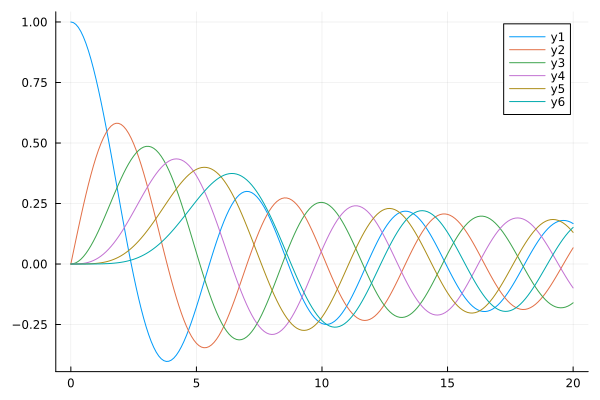

In [3]:
#4 Реализовать алгорим, реализующий обратный ход алгоритма Жордана-Гаусса

Pkg.add("LinearAlgebra")
using LinearAlgebra
function shordan_gauss(A::AbstractMatrix{T}, b::AbstractVector{T})::AbstractVector{T} where T
    @assert size(A, 1) == size(A, 2)
    n = size(A, 1) 
    x = zeros(T, n)
 
    for i in n:-1:1
        x[i] = b[i]
        for j in i+1:n
            x[i] =fma(-x[j] ,A[i,j] , x[i]) 
        end
        x[i] /= A[i,i]
    end
    return x
end

In [5]:
#5 Реализовать алгоритм, осуществляющий приведение матрицы матрицы к ступенчатому виду

function TransformToSteps!(matrix::AbstractMatrix, epsilon::Real = 1e-7)::AbstractMatrix
    @inbounds for k in range(1:size(matrix, 1))
        absval, Δk = findmax(abs, @view(matrix[k:end,k]))

        (absval <= epsilon) && throw("vyroshd matrix")

        Δk > 1 && swap!(@view(matrix[k,k:end]), @view(matrix[k+Δk-1,k:end]))

        for i in k+1:size(matrix,1)
            t = matrix[i,k]/matrix[k,k]
            @. @views matrix[i,k:end] = matrix[i,k:end] - t * matrix[k,k:end] 
        end
    end

    return matrix
end

TransformToSteps! (generic function with 2 methods)

In [6]:
#6 Реализовать алгоритм, реализующий метод Жордана-Гаусса решение СЛАУ для произвольной невырожденной матрицы

@inline function sumprod(vec1::AbstractVector{T}, vec2::AbstractVector{T})::T where T
    s = zero(T)
    @inbounds for i in eachindex(vec1)
    s = fma(vec1[i], vec2[i], s) # fma(x, y, z) = x*y = z
    end
    return s
end
 
function ReverseGauss!(matrix::AbstractMatrix{T}, vec::AbstractVector{T})::AbstractVector{T} where T

 
    x = similar(vec)
    N = size(matrix, 1)
 
    for k in 0:N-1

        x[N-k] = (vec[N-k] - sumprod(@view(matrix[N-k,N-k+1:end]), @view(x[N-k+1:end]))) / matrix[N-k,N-k]
    end
 
    return x
end

ReverseGauss! (generic function with 1 method)

In [7]:
#7 Постараться обеспечить максимально возможную производительность
#алгорима решения СЛАУ; провести временные замеры с помощью макроса
#@time для систем большого размера

for n in 50:50:1000
    println("Matrix with order ",n,"x",n,":")
    @time shordan_gauss(randn(n,n),randn(n))
    @time ReverseGauss!(randn(n,n),randn(n))
end

Matrix with order 50x50:
  0.000016 seconds (4 allocations: 20.578 KiB)
  0.000013 seconds (4 allocations: 20.578 KiB)
Matrix with order 100x100:
  0.000033 seconds (4 allocations: 79.922 KiB)
  0.000028 seconds (4 allocations: 79.922 KiB)
Matrix with order 150x150:
  0.000060 seconds (4 allocations: 178.516 KiB)
  0.000058 seconds (4 allocations: 178.516 KiB)
Matrix with order 200x200:
  0.000107 seconds (4 allocations: 316.078 KiB)
  0.000102 seconds (4 allocations: 316.078 KiB)
Matrix with order 250x250:
  0.000163 seconds (4 allocations: 492.484 KiB)
  0.000158 seconds (4 allocations: 492.484 KiB)
Matrix with order 300x300:
  0.000475 seconds (4 allocations: 708.172 KiB)
  0.000492 seconds (4 allocations: 708.172 KiB)
Matrix with order 350x350:
  0.000685 seconds (4 allocations: 962.859 KiB)
  0.000701 seconds (4 allocations: 962.859 KiB)
Matrix with order 400x400:
  0.000626 seconds (4 allocations: 1.227 MiB)
  0.000605 seconds (4 allocations: 1.227 MiB)
Matrix with order 450x450:

In [8]:
#8 Написать функцию, возвращающую ранг произвольной прямоугольной матрицы

function rank!(matrix::AbstractMatrix{T},epsilon::Real = 1e-7) where T
    TransformToSteps!(Matrix)
 
    i = 1
 
    while abs(matrix[i,i]) <= epsilon
        i+=1
    end
 
    return i-1
end

rank! (generic function with 2 methods)

In [9]:
#9  Написать функцию, возвращающую определитель произвольной квадратной матрицы

function determinant!(matrix::AbstractMatrix{T}) where T
    #@assert for chesk
    TransformToSteps!(matrix)
 
    det = oneunit(T)
    i = 1
 
    while i <= size(matrix, 1)
        if matrix[i, i] == zero(T)
            break
        end
 
        det *= matrix[i, i]
 
        i += 1
    end
 
    return det
end
 
#Tests
matrix = [1.0 2.0 3.0;1.0 6.0 9.0;-1.0 2.0 4.0]
values = [-1.0, 2.0, 2.0]
println("--Matrix--")
display(matrix)
println("--Sv chleny--")
display(values)
println("--Obr Gauss--")
display(ReverseGauss!(matrix,values)) 

--Matrix--


3×3 Matrix{Float64}:
  1.0  2.0  3.0
  1.0  6.0  9.0
 -1.0  2.0  4.0

--Sv chleny--


3-element Vector{Float64}:
 -1.0
  2.0
  2.0

--Obr Gauss--


3-element Vector{Float64}:
 -1.6666666666666665
 -0.4166666666666667
  0.5